In [41]:
import torch
from torch import nn # nn stands for neural network and building blocks for creating neural networks in PyTorch
import matplotlib.pyplot as plt

print(torch.__version__)

2.9.1+cpu


# 1. Data Preparing and Loading

In [42]:
# create known parameters
weight=0.7
bias=0.3

# create data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) # not compress, dim=1 means column wise
y=weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# 1.1 Split data into training and test sets

In [43]:
# Create train/test split
# In this case, there is no validation set
train_split=int(0.8*len(X)) # 80% for training, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [44]:
# visualize
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
      """
      Plots training data, test data and compares predictions.
      """
      plt.figure(figsize=(10,7))

      # plot training data in blue
      plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

      # plot test data in green
      plt.scatter(test_data, test_labels, c='g', s=4,label="Testing data")
      if predictions is not None:
            # plot the predictions in red (predictions were made on the test data
            plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
      # show the legend
      plt.legend(prop={'size': 14})


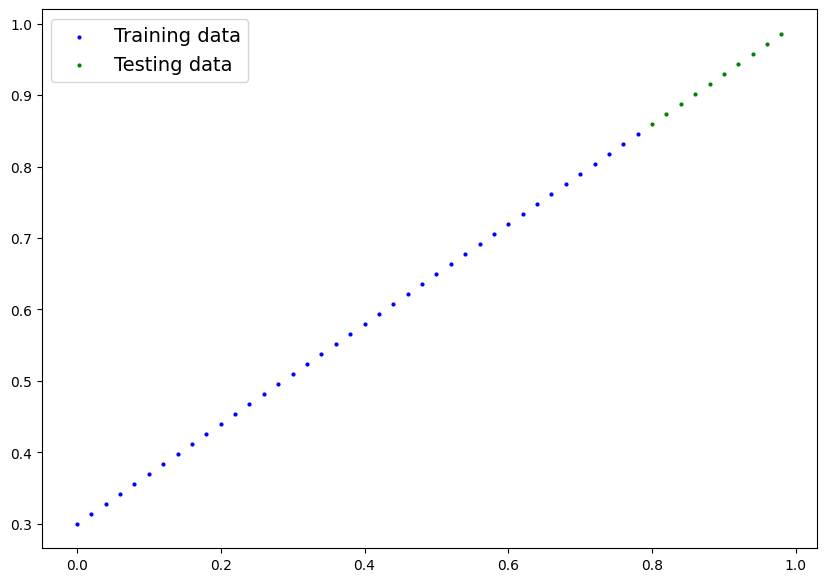

In [45]:
plot_predictions(X_train,y_train,X_test,y_test)

# 2. Build Model

In [46]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize model parameters
        self.weights=nn.Parameter(torch.randn(1,
                              dtype=torch.float),
                              requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),
                               requires_grad=True)
    # forward() defines the computation in the model
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weights* X + self.bias


## 2.1 PyTorch model building essentials
PyTorch has four (give or take) essential modules we can use to create almost any kind of neural network.
- torch.nn
- torch.nn.Parameter
- torch.nn.Module
- torch.optim
- forward()
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

## 2.2 Checking the contents of a PyTorch model

In [47]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [48]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## 2.3 Making predictions using torch.inference_mode()

In [49]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [50]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


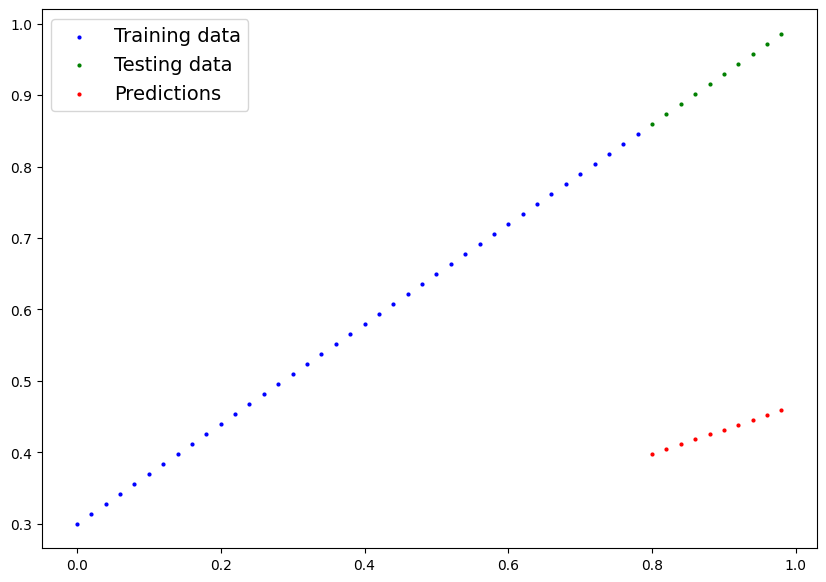

In [51]:

plot_predictions(predictions=y_preds)

# 3. Train Model

In [52]:
# create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss
# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

## 3.1 Creating an optimization loop in PyTorch

- Now we've got a loss function and an optimizer, it's now time to create a training loop (and testing loop).

In [56]:
# training loop
torch.manual_seed(42)
epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count=[]

for epoch in range(epochs):
    model_0.train()
    y_preds = model_0(X_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ## Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred=model_0(X_test)
        test_loss=loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss.detach().numpy()} | MAE Test Loss: {test_loss.detach().numpy()} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 | MAE Test Loss: 0.05646304413676262
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.04819049686193466 | MAE Test Loss: 0.04819049686193466
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.04060482233762741 | MAE Test Loss: 0.04060482233762741
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.03233227878808975 | MAE Test Loss: 0.03233227878808975
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.024059748277068138 | MAE Test Loss: 0.024059748277068138
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.016474086791276932 | MAE Test Loss: 0.016474086791276932
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.008201557211577892 | MAE Test Loss: 0.008201557211577892
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 | MAE Test Loss: 0.005023092031478882
Epoch: 8

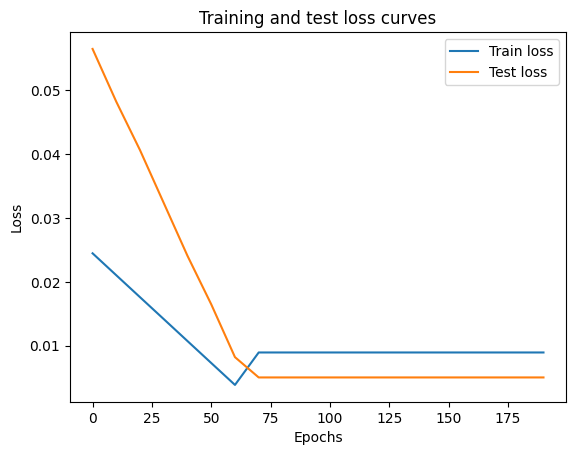

In [57]:

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [58]:

# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# 4. Making predictions with a trained PyTorch model (inference)

In [59]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

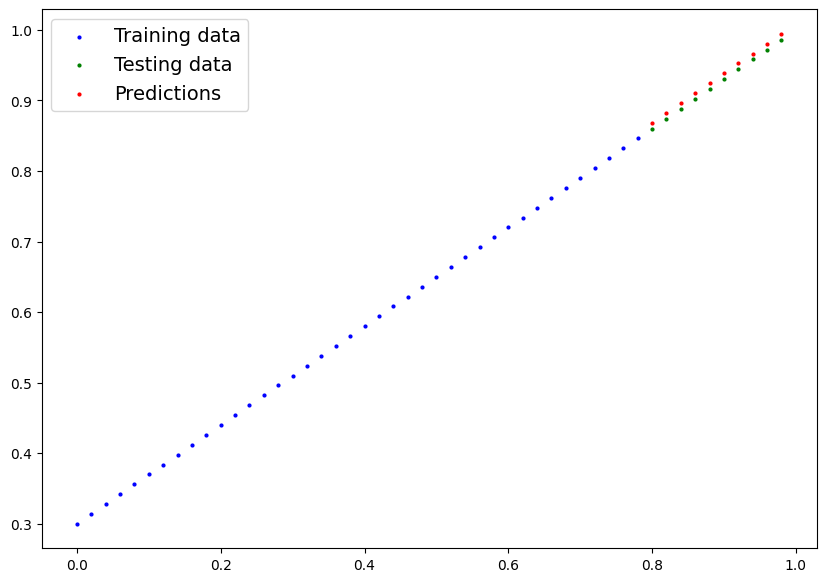

In [60]:
plot_predictions(predictions=y_preds)

prediction is more accurate

# 5. Saving and loading a PyTorch model

In [61]:
from pathlib import Path

# create model directory
model_path=Path("models")
model_path.mkdir(parents=True, exist_ok=True)

# create file name and save path
model_name="01_pytorch_workflow_model_0.pth"
model_save_path=model_path/model_name

# save the model state dict
print(f"Model saved to: {model_save_path}")
torch.save(model_0.state_dict(), ## only saving the state_dict() only saves the models learned parameters
           f=model_save_path)

Model saved to: models\01_pytorch_workflow_model_0.pth


# 6. Loading a saved PyTorch model's state_dict()

In [65]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=model_save_path))


# Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded mode

In [66]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])